# MVP - PUC_RIO - Engenharia de Dados
- **Curso Ciência de Dados e Analytics - Abril/2025**

  - Aluno:      Fabio Nunes Martins. 
  - Professor:  Victor Almeida
  - Professor:  Jose Boara

#1 - Objetivo



Este MVP visa disponibilizar uma análise de dados para apoiar as decisões gerencias sobre a performance de uma equipe de suporte espalhada em diversos escritórios em países diferentes. Essas equipes tratam Tickets de Incidentes com Prioridades (Low, Moderate, High e Critical ).
Para cada tipo de Prioridade existe um SLA ( Service Level Agreement), que limita o tempo máximo para a resolução de cada ticket de Incidente criado.

Este estudo ajudara na renovação do contrato e readequação da equipe.

Baseado nisso, esse MVP tem como objetivo responder as seguintes perguntas:
 
 **P1** – Qual é o número de Tickets/países (locations), em que os Incidentes NÃO foram atendidos dentro do prazo estimado por sua Prioridade?

 **P2** – Qual é o número de Tickets/países (locations), em que os Incidentes FORAM atendidos dentro do prazo estimado por sua Prioridade?

 **P3** – Qual é o número de Tickets/mês, em que os Incidentes NÃO foram atendidos dentro do prazo estimado por sua Prioridade?

 **P4** – Qual é o número de Tickets/mês, em que os Incidentes FORAM atendidos dentro do prazo estimado por sua Prioridade?


# 2 - Pipeline de Dados e ETL

## 2.1 - **BRONZE** - Base de Dados - (141712 rows) 

Origem dos dados: 
- incident_event_log.csv - Kraggle - https://www.kaggle.com/datasets/shamiulislamshifat/it-incident-log-dataset
- incident_location_log.csv - Dado montado manualmente.


### 2.1.1 - Catalogo - BRONZE



**incident_event_log.csv** 

- **number**: 	identificador de incidente ;
- **incident state**:	oito níveis que controlam as transições do processo de gerenciamento de incidentes, desde a abertura até o encerramento do caso;
- **active**: 	atributo booleano que mostra se o registro está ativo ou fechado/cancelado;
- **reassignment_count**: 	número de vezes que o incidente teve o grupo ou os analistas de suporte alterados;
- **reopen_count**: 	número de vezes que a resolução do incidente foi rejeitada pelo autor da chamada;
- **sys_mod_count**: 	número de atualizações de incidentes até aquele momento;
- **made_sla**: 	atributo booleano que mostra se o incidente excedeu o SLA de destino;
- **caller_id**: 	identificador do usuário afetado;
- **opened_by**: 	identificador do usuário que relatou o incidente;
- **opened_at**: 	data e hora de abertura do usuário do incidente;
- **sys_created_by**: 	identificador do usuário que registrou o incidente;
- **sys_created_at**: 	data e hora de criação do sistema de incidentes;
- **sys_updated_by**: 	identificador do usuário que atualizou o incidente e gerou o registro de log atual;
- **sys_updated_at**: 	data e hora de atualização do sistema de incidentes;
- **contact_type**: 	atributo categórico que mostra por qual meio o incidente foi relatado;
- **location**: 	identificador da localização do local afetado;
- **category**: 	descrição de primeiro nível do serviço afetado;
- **subcategory**: 	descrição de segundo nível do serviço afetado (relacionada à descrição de primeiro nível, ou seja, à categoria);
- **u_symptom**: 	descrição da percepção do usuário sobre a disponibilidade do serviço;
- **cmdb_ci**: 	Identificador (item de confirmação) usado para relatar o item afetado (não obrigatório);
- **impact**: 	descrição do impacto causado pelo incidente (valores**: 1 - High; 2 - Medium; 3 - Low);
- **urgency**: 	descrição da urgência informada pelo usuário para a resolução do incidente (valores**: 1 - High; 2 - Medium; 3 - Low);
- **priority**: 	calculado pelo sistema com base no “impact” e na “urgency”;
- **assignment_group**: 	identificador do grupo de suporte responsável pelo incidente;
- **assigned_to**: 	identificador do usuário responsável pelo incidente;
- **knowledge**: 	atributo booleano que mostra se um documento da base de conhecimento foi usado para resolver o incidente;
- **u_priority_confirmation**:	atributo booleano que mostra se o campo de prioridade foi verificado duas vezes;
- **notify**: 	atributo categórico que mostra se foram geradas notificações para o incidente;
- **problem_id**: 	identificador do problema associado ao incidente;
- **rfc**: (	request for change) identificador da solicitação de alteração associada ao incidente;
- **vendor**: 	identificador do fornecedor responsável pelo incidente;
- **caused_by**: 	identificador da RFC responsável pelo incidente;
- **close_code**: 	identificador da resolução do incidente;
- **resolved_by**: 	identificador do usuário que resolveu o incidente;
- **resolved_at**: 	data e hora de resolução do usuário do incidente ;
- **closed_at**: 	data e hora de encerramento do usuário do incidente .

**incident_location_log.csv**

- **Location**: Id da localicação;
- **City**:  Cidade;
- **Country**: Pais;
- **UTC-Time Zone**: Fuso horário da Cidade;



###2.1.3 - Carga de Dados BRONZE

In [0]:

# Import
from pyspark.sql.functions import *
from pyspark.sql.types import *

# Read CSV File
incident_df = spark.read.csv("/FileStore/tables/incident_event_log.csv", inferSchema=True, header=True)
location_df = spark.read.csv("/FileStore/tables/incident_location_log_2.csv", inferSchema=True, header=True)

In [0]:
incident_df.show(5)

+----------+--------------+------+------------------+------------+-------------+--------+-----------+--------------+---------------+--------------+---------------+--------------+---------------+------------+------------+-----------+---------------+-----------+-------+----------+----------+------------+----------------+-----------+---------+-----------------------+-------------+----------+---+------+---------+-----------+---------------+---------------+--------------+
|    number|incident_state|active|reassignment_count|reopen_count|sys_mod_count|made_sla|  caller_id|     opened_by|      opened_at|sys_created_by| sys_created_at|sys_updated_by| sys_updated_at|contact_type|    location|   category|    subcategory|  u_symptom|cmdb_ci|    impact|   urgency|    priority|assignment_group|assigned_to|knowledge|u_priority_confirmation|       notify|problem_id|rfc|vendor|caused_by|closed_code|    resolved_by|    resolved_at|     closed_at|
+----------+--------------+------+------------------+---

In [0]:
location_df.show()

+------------+---------+---------+----------+
|    Location|     City|  Country|  TimeZone|
+------------+---------+---------+----------+
|Location 204|Hyderabad|    India|UTC + 5:30|
|Location 108|     Pune|    India|UTC + 5:30|
|Location 161| Camberra|Austrtali|  UTC + 10|
| Location 18|   London|  England|   UTC + 0|
| Location 55|São Paulo|   Brazil|   UTC - 3|
| Location 56| Santiago|    Chile|   UTC - 3|
| Location 93| Montreal|   Canada|   UTC - 4|
+------------+---------+---------+----------+



###2.1.4 - Criando Base de Dados - BRONZE

In [0]:
%sql DROP DATABASE IF EXISTS inc_bronze CASCADE;

In [0]:
%sql CREATE DATABASE inc_bronze;

In [0]:
location_df.write.mode("overwrite").saveAsTable("inc_bronze.location")

In [0]:
incident_df.write.mode("overwrite").saveAsTable("inc_bronze.incident")

In [0]:
%sql  select count(1) from inc_bronze.incident --141712

count(1)
141712


In [0]:
%sql select * from inc_bronze.location

Location,City,Country,TimeZone
Location 204,Hyderabad,India,UTC + 5:30
Location 108,Pune,India,UTC + 5:30
Location 161,Camberra,Austrtali,UTC + 10
Location 18,London,England,UTC + 0
Location 55,São Paulo,Brazil,UTC - 3
Location 56,Santiago,Chile,UTC - 3
Location 93,Montreal,Canada,UTC - 4


In [0]:
%sql select * from inc_bronze.incident LIMIT 10

number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
INC0000045,New,true,0,0,0,true,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,true,false,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
INC0000045,Resolved,true,0,0,2,true,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,true,false,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
INC0000045,Resolved,true,0,0,3,true,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,true,false,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
INC0000045,Closed,false,0,0,4,true,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,true,false,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
INC0000047,New,true,0,0,0,true,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,true,false,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
INC0000047,Active,true,1,0,1,true,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 21,29/2/2016 05:30,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 24,Resolver 31,true,false,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
INC0000047,Active,true,1,0,2,true,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 21,29/2/2016 05:33,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 24,Resolver 31,true,false,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
INC0000047,Active,true,1,0,3,true,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 804,29/2/2016 11:31,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 24,Resolver 31,true,false,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
INC0000047,Active,true,1,0,4,true,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 703,29/2/2016 11:32,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 24,Resolver 31,true,false,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
INC0000047,Active,true,1,0,5,true,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 332,1/3/2016 09:14,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 24,Resolver 31,true,false,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


##3.2 - **SILVER** - Base de Dados - (141712 rows)

In [0]:
#incident_df_Silver.printSchema()
incident_df.printSchema()


root
 |-- number: string (nullable = true)
 |-- incident_state: string (nullable = true)
 |-- active: boolean (nullable = true)
 |-- reassignment_count: integer (nullable = true)
 |-- reopen_count: integer (nullable = true)
 |-- sys_mod_count: integer (nullable = true)
 |-- made_sla: boolean (nullable = true)
 |-- caller_id: string (nullable = true)
 |-- opened_by: string (nullable = true)
 |-- opened_at: string (nullable = true)
 |-- sys_created_by: string (nullable = true)
 |-- sys_created_at: string (nullable = true)
 |-- sys_updated_by: string (nullable = true)
 |-- sys_updated_at: string (nullable = true)
 |-- contact_type: string (nullable = true)
 |-- location: string (nullable = true)
 |-- category: string (nullable = true)
 |-- subcategory: string (nullable = true)
 |-- u_symptom: string (nullable = true)
 |-- cmdb_ci: string (nullable = true)
 |-- impact: string (nullable = true)
 |-- urgency: string (nullable = true)
 |-- priority: string (nullable = true)
 |-- assignment_gr

### 3.2.1 - Catalogo - SILVER


**Tabela = inc_silver.incident** 

- **number**: 	identificador de incidente ;
- **incident state**:	oito níveis que controlam as transições do processo de gerenciamento de incidentes, desde a abertura até o encerramento do caso;
- **active**: 	atributo booleano que mostra se o registro está ativo ou fechado/cancelado;
- **reassignment_count**: 	número de vezes que o incidente teve o grupo ou os analistas de suporte alterados;
- **reopen_count**: 	número de vezes que a resolução do incidente foi rejeitada pelo autor da chamada;
- **made_sla**: 	atributo booleano que mostra se o incidente excedeu o SLA de destino;
- **opened_at_TS**: 	data e hora de abertura do usuário do incidente;
- **location**: 	identificador da localização do local afetado;
- **priority**: 	calculado pelo sistema com base no “impact” e na “urgency”;
- **resolved_by**: 	identificador do usuário que resolveu o incidente;
- **resolved_at_TS**: 	data e hora de resolução do usuário do incidente ;
- **closed_at_TS**: 	data e hora de encerramento do usuário do incidente .

**Tabela = inc_silver.location**

- **Location**: Id da localicação;
- **City**:  Cidade;
- **Country**: Pais;
- **UTC-Time Zone**: Fuso horário da Cidade;


###2.1.4 - Criando Base de Dados - SILVER

In [0]:
incident_df.filter(incident_df.number=="INC0000047").show()

+----------+------------------+------+------------------+------------+-------------+--------+-----------+--------------+---------------+--------------+---------------+--------------+---------------+------------+------------+-----------+---------------+-----------+-------+----------+----------+------------+----------------+-----------+---------+-----------------------+-------------+----------+---+------+---------+-----------+--------------+--------------+--------------+
|    number|    incident_state|active|reassignment_count|reopen_count|sys_mod_count|made_sla|  caller_id|     opened_by|      opened_at|sys_created_by| sys_created_at|sys_updated_by| sys_updated_at|contact_type|    location|   category|    subcategory|  u_symptom|cmdb_ci|    impact|   urgency|    priority|assignment_group|assigned_to|knowledge|u_priority_confirmation|       notify|problem_id|rfc|vendor|caused_by|closed_code|   resolved_by|   resolved_at|     closed_at|
+----------+------------------+------+--------------

In [0]:
incident_df_Silver = incident_df.withColumn("opened_at_TS", to_timestamp(col("opened_at"), "d/M/yyyy hh:mm"))
incident_df_Silver = incident_df_Silver.withColumn("resolved_at_TS", to_timestamp(col("resolved_at"), "d/M/yyyy hh:mm"))
incident_df_Silver = incident_df_Silver.withColumn("closed_at_TS", to_timestamp(col("closed_at"), "d/M/yyyy hh:mm"))


In [0]:
incident_df_Silver.printSchema()

root
 |-- number: string (nullable = true)
 |-- incident_state: string (nullable = true)
 |-- active: boolean (nullable = true)
 |-- reassignment_count: integer (nullable = true)
 |-- reopen_count: integer (nullable = true)
 |-- sys_mod_count: integer (nullable = true)
 |-- made_sla: boolean (nullable = true)
 |-- caller_id: string (nullable = true)
 |-- opened_by: string (nullable = true)
 |-- opened_at: string (nullable = true)
 |-- sys_created_by: string (nullable = true)
 |-- sys_created_at: string (nullable = true)
 |-- sys_updated_by: string (nullable = true)
 |-- sys_updated_at: string (nullable = true)
 |-- contact_type: string (nullable = true)
 |-- location: string (nullable = true)
 |-- category: string (nullable = true)
 |-- subcategory: string (nullable = true)
 |-- u_symptom: string (nullable = true)
 |-- cmdb_ci: string (nullable = true)
 |-- impact: string (nullable = true)
 |-- urgency: string (nullable = true)
 |-- priority: string (nullable = true)
 |-- assignment_gr

In [0]:
#incident_df_Silver_2.select(count(expr("*"))).show()  --141712
incident_df_Silver.filter(col("closed_at").isNull()).show()

+------+--------------+------+------------------+------------+-------------+--------+---------+---------+---------+--------------+--------------+--------------+--------------+------------+--------+--------+-----------+---------+-------+------+-------+--------+----------------+-----------+---------+-----------------------+------+----------+---+------+---------+-----------+-----------+-----------+---------+------------+--------------+------------+
|number|incident_state|active|reassignment_count|reopen_count|sys_mod_count|made_sla|caller_id|opened_by|opened_at|sys_created_by|sys_created_at|sys_updated_by|sys_updated_at|contact_type|location|category|subcategory|u_symptom|cmdb_ci|impact|urgency|priority|assignment_group|assigned_to|knowledge|u_priority_confirmation|notify|problem_id|rfc|vendor|caused_by|closed_code|resolved_by|resolved_at|closed_at|opened_at_TS|resolved_at_TS|closed_at_TS|
+------+--------------+------+------------------+------------+-------------+--------+---------+-----

In [0]:
incident_df_Silver = incident_df_Silver.drop('sys_mod_count','caller_id','opened_by','sys_created_by','sys_created_at','sys_updated_by','sys_updated_at','contact_type','category','subcategory','u_symptom','cmdb_ci','impact','urgency','assignment_group','assigned_to','knowledge','u_priority_confirmation','notify','problem_id','rfc','vendor','caused_by','closed_code','opened_at','resolved_at','closed_at')
incident_df_Silver.show()

+----------+------------------+------+------------------+------------+--------+------------+------------+---------------+-------------------+-------------------+-------------------+
|    number|    incident_state|active|reassignment_count|reopen_count|made_sla|    location|    priority|    resolved_by|       opened_at_TS|     resolved_at_TS|       closed_at_TS|
+----------+------------------+------+------------------+------------+--------+------------+------------+---------------+-------------------+-------------------+-------------------+
|INC0000045|               New|  true|                 0|           0|    true|Location 143|3 - Moderate|Resolved by 149|2016-02-29 01:16:00|2016-02-29 11:29:00|2016-03-05 00:00:00|
|INC0000045|          Resolved|  true|                 0|           0|    true|Location 143|3 - Moderate|Resolved by 149|2016-02-29 01:16:00|2016-02-29 11:29:00|2016-03-05 00:00:00|
|INC0000045|          Resolved|  true|                 0|           0|    true|Location 14

In [0]:
%sql DROP DATABASE IF EXISTS inc_silver CASCADE;

In [0]:
%sql CREATE DATABASE inc_silver;

In [0]:
incident_df_Silver.show()

+----------+------------------+------+------------------+------------+--------+------------+------------+---------------+-------------------+-------------------+-------------------+
|    number|    incident_state|active|reassignment_count|reopen_count|made_sla|    location|    priority|    resolved_by|       opened_at_TS|     resolved_at_TS|       closed_at_TS|
+----------+------------------+------+------------------+------------+--------+------------+------------+---------------+-------------------+-------------------+-------------------+
|INC0000045|               New|  true|                 0|           0|    true|Location 143|3 - Moderate|Resolved by 149|2016-02-29 01:16:00|2016-02-29 11:29:00|2016-03-05 00:00:00|
|INC0000045|          Resolved|  true|                 0|           0|    true|Location 143|3 - Moderate|Resolved by 149|2016-02-29 01:16:00|2016-02-29 11:29:00|2016-03-05 00:00:00|
|INC0000045|          Resolved|  true|                 0|           0|    true|Location 14

In [0]:
location_df.write.mode("overwrite").saveAsTable("inc_silver.location")

In [0]:
incident_df_Silver.write.mode("overwrite").saveAsTable("inc_silver.incident")

In [0]:
%sql  select count(1) from inc_silver.incident -- 141712


count(1)
84156


In [0]:
%sql select * from inc_silver.location

Location,City,Country,TimeZone
Location 204,Hyderabad,India,UTC + 5:30
Location 108,Pune,India,UTC + 5:30
Location 161,Camberra,Austrtali,UTC + 10
Location 18,London,England,UTC + 0
Location 55,São Paulo,Brazil,UTC - 3
Location 56,Santiago,Chile,UTC - 3
Location 93,Montreal,Canada,UTC - 4


In [0]:
%sql select * from inc_silver.incident LIMIT 10

number,incident_state,active,reassignment_count,reopen_count,made_sla,location,priority,resolved_by,opened_at_TS,resolved_at_TS,closed_at_TS
INC0000045,New,true,0,0,true,Location 143,3 - Moderate,Resolved by 149,2016-02-29T01:16:00.000+0000,2016-02-29T11:29:00.000+0000,2016-03-05T00:00:00.000+0000
INC0000045,Resolved,true,0,0,true,Location 143,3 - Moderate,Resolved by 149,2016-02-29T01:16:00.000+0000,2016-02-29T11:29:00.000+0000,2016-03-05T00:00:00.000+0000
INC0000045,Resolved,true,0,0,true,Location 143,3 - Moderate,Resolved by 149,2016-02-29T01:16:00.000+0000,2016-02-29T11:29:00.000+0000,2016-03-05T00:00:00.000+0000
INC0000045,Closed,false,0,0,true,Location 143,3 - Moderate,Resolved by 149,2016-02-29T01:16:00.000+0000,2016-02-29T11:29:00.000+0000,2016-03-05T00:00:00.000+0000
INC0000047,New,true,0,0,true,Location 165,3 - Moderate,Resolved by 81,2016-02-29T04:40:00.000+0000,2016-03-01T09:52:00.000+0000,2016-03-06T10:00:00.000+0000
INC0000047,Active,true,1,0,true,Location 165,3 - Moderate,Resolved by 81,2016-02-29T04:40:00.000+0000,2016-03-01T09:52:00.000+0000,2016-03-06T10:00:00.000+0000
INC0000047,Active,true,1,0,true,Location 165,3 - Moderate,Resolved by 81,2016-02-29T04:40:00.000+0000,2016-03-01T09:52:00.000+0000,2016-03-06T10:00:00.000+0000
INC0000047,Active,true,1,0,true,Location 165,3 - Moderate,Resolved by 81,2016-02-29T04:40:00.000+0000,2016-03-01T09:52:00.000+0000,2016-03-06T10:00:00.000+0000
INC0000047,Active,true,1,0,true,Location 165,3 - Moderate,Resolved by 81,2016-02-29T04:40:00.000+0000,2016-03-01T09:52:00.000+0000,2016-03-06T10:00:00.000+0000
INC0000047,Active,true,1,0,true,Location 165,3 - Moderate,Resolved by 81,2016-02-29T04:40:00.000+0000,2016-03-01T09:52:00.000+0000,2016-03-06T10:00:00.000+0000


In [0]:
%sql desc inc_silver.location

col_name,data_type,comment
Location,string,null
City,string,null
Country,string,null
TimeZone,string,null


##3.3 - **GOLD** - Base de Dados - (24985 rows)

### 3.3.1 - Catalogo - Gold






**Tabela = inc_gold.incident** 

- **number**: 	identificador de incidente ;
- **incident state**:	oito níveis que controlam as transições do processo de gerenciamento de incidentes, desde a abertura até o encerramento do caso;
- **active**: 	atributo booleano que mostra se o registro está ativo ou fechado/cancelado;
- **reassignment_count**: 	número de vezes que o incidente teve o grupo ou os analistas de suporte alterados;
- **reopen_count**: 	número de vezes que a resolução do incidente foi rejeitada pelo autor da chamada;
- **made_sla**: 	atributo booleano que mostra se o incidente excedeu o SLA de destino;
- **opened_at_TS**: 	data e hora de abertura do usuário do incidente;
- **location**: 	identificador da localização do local afetado;
- **priority**: 	calculado pelo sistema com base no “impact” e na “urgency”;
- **resolved_by**: 	identificador do usuário que resolveu o incidente;
- **resolved_at_TS**: 	data e hora de resolução do usuário do incidente ;
- **closed_at_TS**: 	data e hora de encerramento do usuário do incidente .

**Tabela = inc_gold.location**

- **Location**: Id da localicação;
- **City**:  Cidade;
- **Country**: Pais;
- **UTC-Time Zone**: Fuso horário da Cidade;

###3.3.2 - Criando Base de Dados - GOLD

In [0]:
%sql DROP DATABASE IF EXISTS inc_gold CASCADE;

In [0]:
%sql CREATE DATABASE inc_gold;

In [0]:
incident_df_Gold =incident_df_Silver.filter(incident_df_Silver.incident_state=="Closed")

In [0]:
location_df.write.mode("overwrite").saveAsTable("inc_gold.location")

In [0]:
incident_df_Gold.write.mode("overwrite").saveAsTable("inc_gold.incident")

In [0]:
%sql  select count(1) from inc_gold.incident -- 24985

count(1)
24985


In [0]:
%sql select * from inc_gold.location

Location,City,Country,TimeZone
Location 204,Hyderabad,India,UTC + 5:30
Location 108,Pune,India,UTC + 5:30
Location 161,Camberra,Austrtali,UTC + 10
Location 18,London,England,UTC + 0
Location 55,São Paulo,Brazil,UTC - 3
Location 56,Santiago,Chile,UTC - 3
Location 93,Montreal,Canada,UTC - 4


In [0]:
%sql select * from inc_gold.incident LIMIT 10


number,incident_state,active,reassignment_count,reopen_count,made_sla,location,priority,resolved_by,opened_at_TS,resolved_at_TS,closed_at_TS
INC0000045,Closed,false,0,0,true,Location 143,3 - Moderate,Resolved by 149,2016-02-29T01:16:00.000+0000,2016-02-29T11:29:00.000+0000,2016-03-05T00:00:00.000+0000
INC0000047,Closed,false,1,0,true,Location 165,3 - Moderate,Resolved by 81,2016-02-29T04:40:00.000+0000,2016-03-01T09:52:00.000+0000,2016-03-06T10:00:00.000+0000
INC0000057,Closed,false,0,0,true,Location 204,3 - Moderate,Resolved by 5,2016-02-29T06:10:00.000+0000,2016-03-01T02:55:00.000+0000,2016-03-06T03:00:00.000+0000
INC0000060,Closed,false,0,0,true,Location 204,3 - Moderate,Resolved by 113,2016-02-29T06:38:00.000+0000,2016-03-02T00:06:00.000+0000,null
INC0000062,Closed,false,1,0,false,Location 93,2 - High,Resolved by 62,2016-02-29T06:58:00.000+0000,null,null
INC0000063,Closed,false,1,0,true,Location 93,3 - Moderate,Resolved by 62,2016-02-29T07:08:00.000+0000,null,null
INC0000064,Closed,false,1,0,true,Location 143,3 - Moderate,Resolved by 71,2016-02-29T07:10:00.000+0000,null,null
INC0000065,Closed,false,6,0,true,Location 108,3 - Moderate,Resolved by 197,2016-02-29T07:38:00.000+0000,null,null
INC0000066,Closed,false,1,0,true,Location 161,3 - Moderate,Resolved by 208,2016-02-29T08:03:00.000+0000,null,null
INC0000067,Closed,false,1,0,true,Location 143,3 - Moderate,Resolved by 215,2016-02-29T08:03:00.000+0000,2016-03-02T11:11:00.000+0000,2016-03-07T00:00:00.000+0000


In [0]:
%sql desc inc_gold.location

col_name,data_type,comment
Location,string,null
City,string,null
Country,string,null
TimeZone,string,null


# 4 - Modelagem


Para a análise dos dados do problema proposto, optei pelo esquema Multidimensional  ESTRELA.

In [0]:
from IPython.display import Image, display

# URL da imagem em versão raw do GitHub
image_url = "https://raw.githubusercontent.com/Tirrenus/PUC-RIO_Eng_Dados-MVP/main/Modelo_de_Dados.png"
          

# Exibe a imagem no notebook
display(Image(url=image_url))

# 5 - Análise de Dados

Análise dos dados levaram as respostas as perguntas feitas. Na sequencias poderemos ver as respostas em formato de SQL Query e em representação GRÁFICA.


## 5.1 - Perguntas e respostas

 **P1** – Qual é o número de Tickets/países (locations), em que os Incidentes NÃO foram atendidos dentro do prazo estimado por sua Prioridade?

 **P2** – Qual é o número de Tickets/países (locations), em que os Incidentes FORAM atendidos dentro do prazo estimado por sua Prioridade?

 **P3** – Qual é o número de Tickets/mês, em que os Incidentes NÃO foram atendidos dentro do prazo estimado por sua Prioridade?

 **P4** – Qual é o número de Tickets/mês, em que os Incidentes FORAM atendidos dentro do prazo estimado por sua Prioridade?


### 5.1.1 - P1 - Estouro de SLA por Pais

In [0]:
%sql select count(i.number) as qte, l.Country from inc_gold.incident i, inc_gold.location l where i.location=l.Location and i.made_sla is false group by  l.Country

qte,Country
2939,India
58,Chile
1185,Austrtali
765,Canada
99,Brazil
24,England


Out[64]: <AxesSubplot:xlabel='Country'>

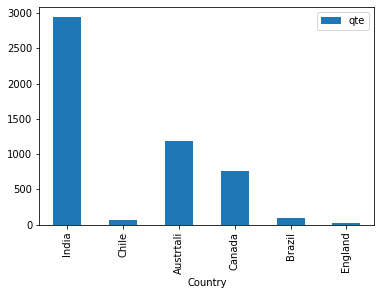

In [0]:
from pyspark.sql import SparkSession
import pandas as pd

query = f"select count(i.number) as qte, l.Country from inc_gold.incident i, inc_gold.location l where i.location=l.Location and i.made_sla is false group by  l.Country"

result = spark.sql(query)
result = result.toPandas()
result.plot(kind='bar', x='Country', y='qte')

### 5.1.1 - P2 - Dentro do SLA por Pais

In [0]:
%sql select count(i.number) as Incidents, l.Country from inc_gold.incident i, inc_gold.location l where i.location=l.Location and i.made_sla is true group by  l.Country

Incidents,Country
4782,India
93,Chile
2824,Austrtali
1170,Canada
144,Brazil
35,England


Out[66]: <AxesSubplot:xlabel='Country'>

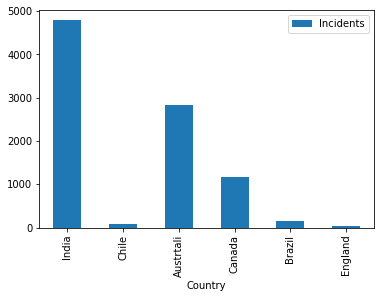

In [0]:
query = f"select count(i.number) as Incidents, l.Country from inc_gold.incident i, inc_gold.location l where i.location=l.Location and i.made_sla is true group by  l.Country"

result = spark.sql(query)
result = result.toPandas()
result.plot(kind='bar', x='Country', y='Incidents')

### 5.1.3 - P3 - Tickets com SLA estourados por mês

In [0]:
%sql
select  count(number) Incidents, MONTH(opened_at_TS) Mes from inc_gold.incident where made_sla is false and opened_at_TS is not null group by MONTH(opened_at_TS) order by Mes ;


Incidents,Mes
18,1
23,2
2968,3
868,4
956,5
2,7
6,8
5,9
7,10
4,11


<Axes: xlabel='Mes'>

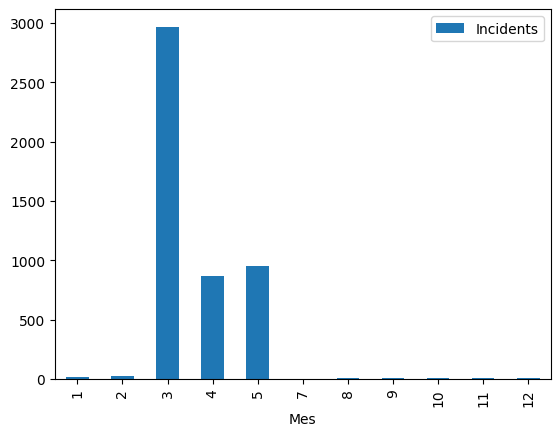

In [0]:
query = f"select  count(number) Incidents, MONTH(opened_at_TS) Mes from inc_gold.incident where made_sla is false and opened_at_TS is not null group by MONTH(opened_at_TS) order by Mes "

result = spark.sql(query)
result = result.toPandas()
result.plot(kind='bar', x='Mes', y='Incidents')

### 5.1.4 - P4 - Tickets com Dentro do SLA por mês

In [0]:
%sql
select  count(number) Incidents, MONTH(opened_at_TS) Mes from inc_gold.incident where made_sla is true and opened_at_TS is not null group by MONTH(opened_at_TS) order by Mes ;


Incidents,Mes
28,1
125,2
2092,3
3525,4
3279,5
3,6
2,7
4,8
5,9
3,10


<Axes: xlabel='Mes'>

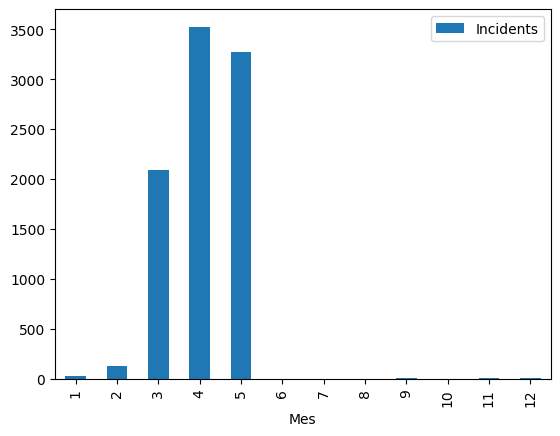

In [0]:
query = f"select  count(number) Incidents, MONTH(opened_at_TS) Mes from inc_gold.incident where made_sla is true and opened_at_TS is not null group by MONTH(opened_at_TS) order by Mes "

result = spark.sql(query)
result = result.toPandas()
result.plot(kind='bar', x='Mes', y='Incidents')

# 6 - Autoavaliação
A escolha do dataset relacionado a Incidentes foi fácil porque eu já estou bastante familiarizado com esse universo. A aquisição do mesmo, foi fácil devido a facilidade que o site  https://www.kaggle.com/  proporciona.

Encontrei bastante dificuldade na transformação das datas que vieram em STRING e que as vezes vinham em formatos para o TIMESTAMP, pois no CSV, as datas vieram com  distintos formatos  d/m/yyyy mm:ss, as vezes dd/m/yyyyy mm:ss e as vezes d/mm/yyyy mm:ss. Foram horas buscando conhecimento para fazer essa conversão usando o Pyspark
Verifiquei que na criação das tabelas do banco de dados alguns dados das colunas referente a DATAS, foram importados no NULL. Acredito que haja algum problema com o TIMESTAMP do Dataframe  x o TIMESTAMP do banco de Dados. Eu ainda estou verificando como revolver esse problema. 

Gostaria de ter proposto mais perguntas, mas devido ao tempo escasso, não foi possível ter mais tempo para aumentar a análise do dataset. 


# 8	Principais ferramentas utilizadas:

- Databricks Community
- Apache Spark (PySpark e Spark SQL)
- Python / Pandas
- SQL
